# Ford GoBike System Data Exploration
## by (Robert Gonpou Mesleh Jr)

## Introduction
This file expolore a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling
In this section, the data is loaded and explored in order to understand the various features. Necessary cleaning is performed on the data , as required, to make it tidy for analysis.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Set maximum column width and row height
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)

# Load in the dataset into a pandas dataframe, named df
df = pd.read_csv('https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv')

In [3]:
# Read few lines of the data to understand the content of the file
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Assess high-level overview of the data shape and composition
print ('The original shape of the data is ', df.shape)
print ('--------------------------------------')
print (df.dtypes)
print ('--------------------------------------')

The original shape of the data is  (183412, 16)
--------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
--------------------------------------


## Structure of the dataset
The dataset orignially contained 183,412 bike rides with 16 features (duration in seconds, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user_type, member birth year, member gender, bike share for all trip). Most variables are categorical in nature, but duration_sec is numeric.

Some variables in the dataset appears to have wrong data types. I will correct those, and I will break the `start_time` variable into multipe variables so that year, month, day, time, and weekdays are each seperate. It might also me useful to convert ride duration from seconds to minutes into a new variable. After doing that, the dataset will have 22 variables. 

In [5]:
# Correct variables data types
# create a list of the date columns that needs the data type changed
date_vars = ['start_time','end_time']

# use a for loop to change the columns data type to datetime
for columns in date_vars:
    df[columns] = pd.to_datetime(df[columns]);

# create a list of the integer columns that needs the data type changed
integer_vars = ['start_station_id','end_station_id','member_birth_year']

# using a for loop to change the columns data type to integer
for columns in integer_vars:
    df[columns] = df[columns].fillna(0).astype(int)

In [6]:
# Separate start_time and end_time columns into year, month, day, hour, and day of week
df['ride_year']= df['start_time'].dt.year
df['start_month']= df['start_time'].dt.month
df['start_day']= df['start_time'].dt.day
df['start_hour']= df['start_time'].dt.hour
df['start_weekday']= (df['start_time']).dt.day_name()
df['duration_mins']= (df['duration_sec']) / 60

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_year,start_month,start_day,start_hour,duration_mins
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.0,183412.0,183412.000000,183412.000000,183412.000000
mean,726.078435,138.441569,37.771223,-122.352664,136.102780,37.771427,-122.352250,4472.906375,1895.366132,2019.0,2.0,15.298977,13.458421,12.101307
std,1794.389780,111.811012,0.099581,0.117097,111.544544,0.099490,0.116673,1664.383394,411.850439,0.0,0.0,8.028187,4.724978,29.906496
min,61.000000,0.000000,37.317298,-122.453704,0.000000,37.317298,-122.453704,11.000000,0.000000,2019.0,2.0,1.000000,0.000000,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.000000,2019.0,2.0,8.000000,9.000000,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,2019.0,2.0,15.000000,14.000000,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,2019.0,2.0,22.000000,17.000000,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,2.0,28.000000,23.000000,1424.066667


In [8]:
# Assess high-level overview of the data shape and composition after the wrangling
print ('The new shape of the data is ', df.shape)
print ('--------------------------------------')
print (df.dtypes)

The new shape of the data is  (183412, 22)
--------------------------------------
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
ride_year                           int64
start_month                         int64
start_day                           int64
start_hour                          int64
start_weekday                      object
duration_mins                     fl

## Main features of interest in the dataset

I am intereted in the average duration of the trip, and when are most trips taken in terms of time of day, day of the week, or month of the year. I am also interested in understanding which charactistic features influnce trip duration and period.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the period the ride was started (`start_day`,`start_weekday` and `start_hour`) will have the strongest influence of the number and duration of the ride. I also think that `member_gender`, `member_birth_year` and `user_type` would have impact on the ride duration.

## Univariate Exploration

I will begin with looking at the distribution of the trip duration which happens to be the main variable of interest, since I want to undertand the average duration of trips

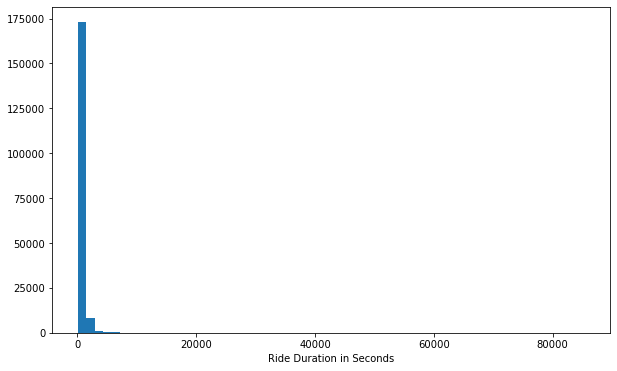

In [9]:
# start with a standard-scaled plot
bin_size = 60
bins = np.arange(0, df['duration_sec'].quantile(0.99)+bin_size, bin_size)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_sec', bins = bin_size)
plt.xlabel('Ride Duration in Seconds');

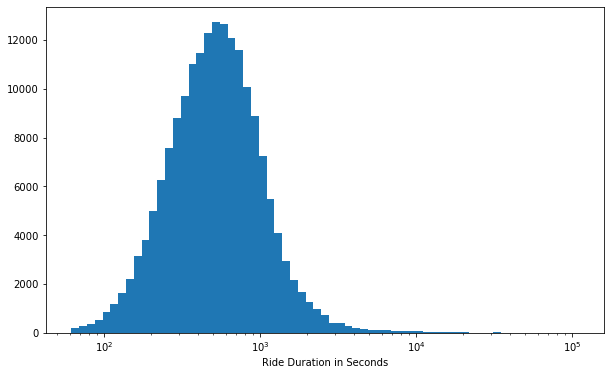

In [10]:
# Let's put the distribution on a log scale since there is a long tail in the distribution
logbins = 0.05
bins = 10 ** np.arange(1.79, 5+logbins, logbins)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log');
plt.xlabel('Ride Duration in Seconds');

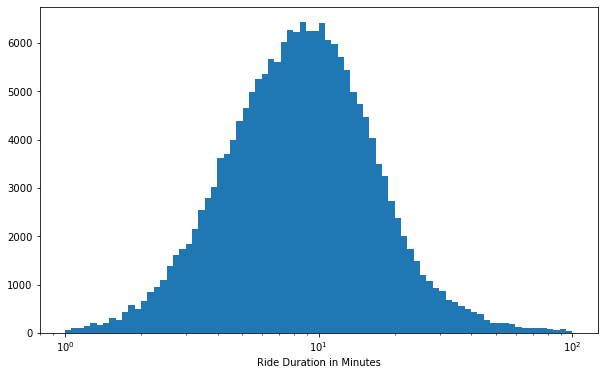

In [11]:
# Let's look at the distribution of the duration in minutes on a log scale
logbins = 0.025
bins = 10 ** np.arange(0, 2+logbins, logbins)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_mins', bins = bins)
plt.xscale('log');
plt.xlabel('Ride Duration in Minutes');

A lot of the trip duration in seconds are shorter, while just a few of the rides have long durations.
The duration distribution looks unimodal when ploteed on a log-scale.

Next, the month variables of interest are looked at: `start_day`, `start_weekday`, `start_hour`

In [12]:
# Creating a funtion for all countplot to reuse in the analysis
def fxCountPlot (df, xVar, hVar = None, color = 0, palette = None, order = None, figsize = (12,6)):
    
    # Setting Plot dimensions
    sb.set(rc = {'axes.facecolor':'None', 'figure.figsize':figsize})
    
    # The Plot
    sb.countplot(data = df, x = xVar, hue = hVar, color = sb.color_palette()[color], palette = palette, order = order, edgecolor = 'black');
    
    # Clean up variable names after plotting
    xVar = xVar.replace("_"," ")
    if hVar:
        hVar = hVar.replace("_"," ")
    
    # Adding and Formating Title
    plt.title(f'''Distritution of {xVar} {'by' if hVar else ''} {hVar if hVar else ''}'''.title(), fontsize = 13, weight = "bold")
    
    # Adding and formatting x label
    plt.xlabel(xVar.title(), fontsize = 10)
 
    # Adding and formatting y label
    plt.ylabel('Frequency'.title(), fontsize = 10)

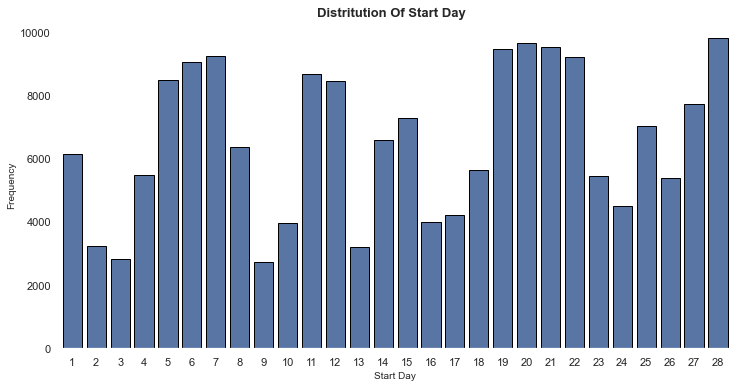

In [13]:
# Ploting frequency of each day of the month by calling the plot function
fxCountPlot(df,'start_day')

The trips are spread through out the month of February. More trips are taken in the last week for the month, with the highest number of trips were taken on the 28th. Most of the high trips appears to taken during specific days. Aparently, most people prefer to ride on special days of the week.

Next up, we look at the weekday count of the trips

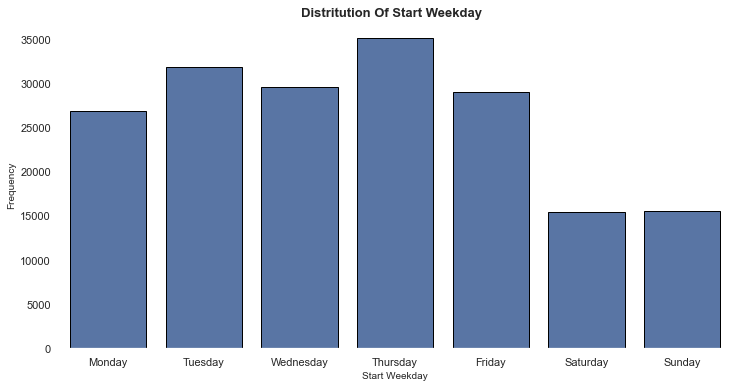

In [14]:
# Ploting frequency of weekdays in order
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fxCountPlot(df,'start_weekday', order = weekdays)

The most rides are on Thursday. The two last days of the week have the lowest number of trips.

Next up, another variable of interest is looked at: `start_hour`

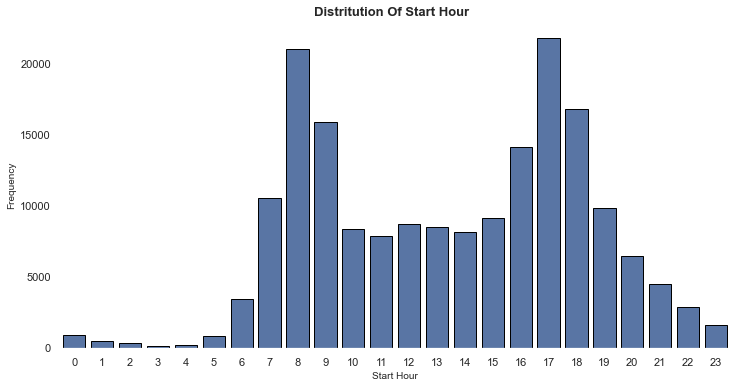

In [15]:
# Plotting hours of the day in order from midnight to 23;00 hours
fxCountPlot(df,'start_hour')

It appears that most riders prefer to take their trips between 4:00pm - 6:00pm and 7:00am and 9:00am, with the most prefered time being 17:00hr. Interestingly, there are still some people who prefer from midnight to 5:00am trips.

Next, we will look at the gender distribution of the riders.

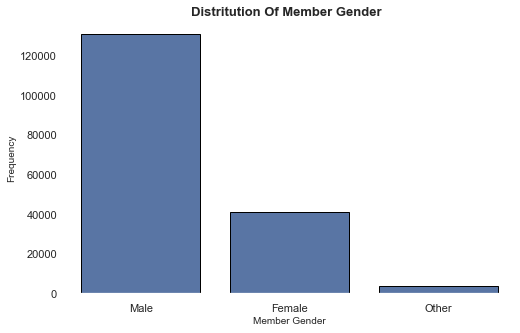

In [16]:
# Plotting riders gender to determine the number of males and females
arrange = df.member_gender.value_counts().index
fxCountPlot(df,'member_gender', order = arrange, figsize = (8,5))

Majority of the riders are male. Females are aproximately one-third of the riders. There seems to be a very small number of riders who do not identify as either male or female.

Next, we will look at the age distribution of the riders in terms of their year of birth.

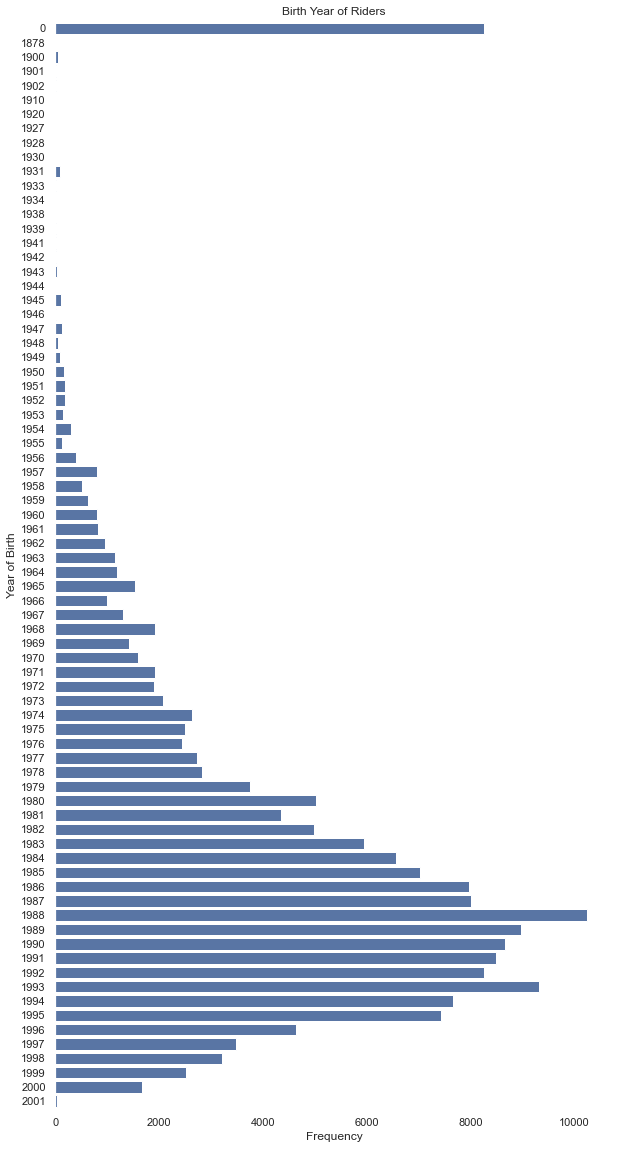

In [17]:
# Plotting the riders year of birth to determine the age range
pcolor = sb.color_palette()[0]
sb.set(rc = {'axes.facecolor':'None', 'figure.figsize':(10,20)})
sb.countplot(data=df, y='member_birth_year', color = pcolor)
plt.xlabel('Frequency')
plt.ylabel('Year of Birth');
plt.title('Birth Year of Riders');

Some riders do not birth year data, and some years, especially beyond 1950s, have very less number. Those observations will be queried and dropped from the data frame, so that the data is suitable for the analysis.

Next, data with `member_birth_year` earlier than 1950 are dropped from the dataset and the age distribution of riders is reploted.

In [18]:
# Dropping riders with birth year older then 1950
# df.query("member_birth_year < 1950")
df.drop(df[df['member_birth_year'] < 1950].index, inplace = True)

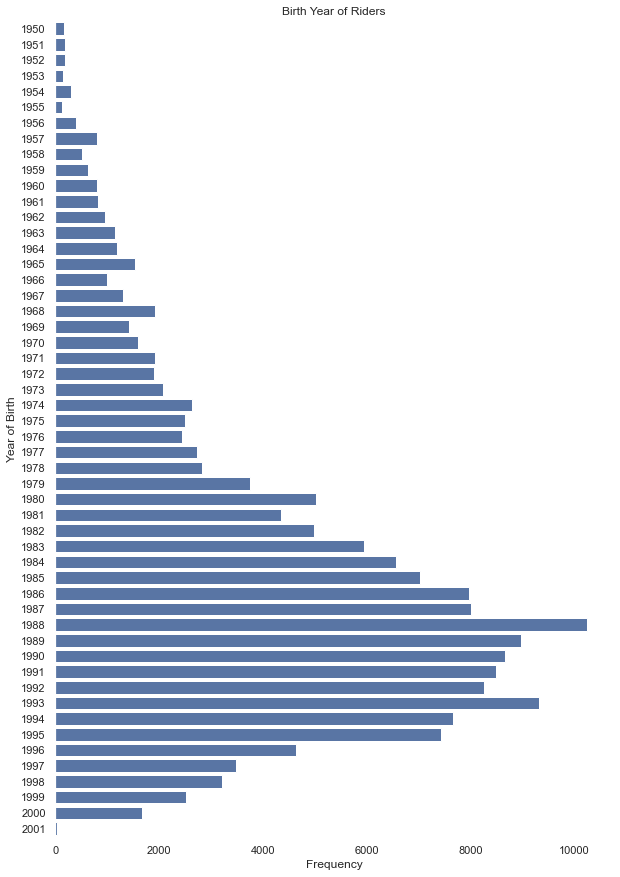

In [19]:
# Replotting the riders year of birth to verify that the rows were dropped
pcolor = sb.color_palette()[0]
sb.set(rc = {'axes.facecolor':'None', 'figure.figsize':(10,15)})
sb.countplot(data=df, y='member_birth_year', color = pcolor)
plt.xlabel('Frequency')
plt.ylabel('Year of Birth');
plt.title('Birth Year of Riders');

The years with almost no ride data have been removed from the data frame. Now we can see clearly how the rides by each year of birth. More rides are taken by younger people, as seen in the increase from older years to recent years.

We are next interested in how the rides are distributed by user type.

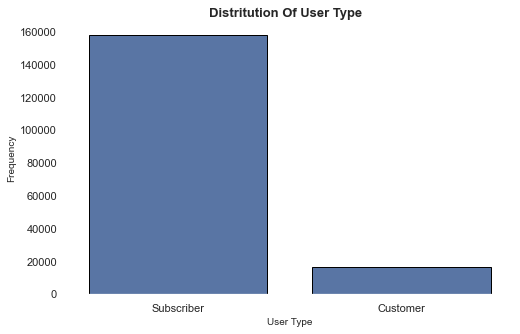

In [20]:
# Plotting the user type of the riders
arrange = df.user_type.value_counts().index
fxCountPlot(df,'user_type', order = arrange, figsize = (8,5))

Subcriber riders are six times higer than customer riders.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration in seconds variable, which was a key interst, took on a large range of values and was somehow difficult to make a good sense of. Hence, it was converted to duration in minutes and looked at using a log transform. The data looked unimodal under the transformation, with the peak at 30k.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The expectation had been that most rides would be taken on weekend day but the charts showed the least number of trips on Saturday and Sunday. However, as expected, most of the the riders were male and most were also younger folks. The ride start time was expanded in order to be able the analyze the trip by day of the month, days of the week and hour of the day. trip duration was also converted from seconds to minutes to make it easily interpretatble.

## Bivariate Exploration

In this Bivariate Exploration section, I would compare two varables, especially, average trip duration, across different categorical variables.

In [21]:
# Creating a funtion for all countplot to reuse in the analysis
def fxBarPlot (df, xVar, yVar = 'duration_mins', color = 0, palette = None, order = None, figsize = (10,6)):
    
    # Setting Plot dimensions
    sb.set(rc = {'axes.facecolor':'None', 'figure.figsize':figsize})
    
    # The Plot
    sb.barplot(data = df, x = xVar, y = yVar, color = sb.color_palette()[color], palette = palette, order = order, edgecolor = 'black');
    
    # Clean up variable names after plotting
    xVar = xVar.replace("_"," ")
    yVar = yVar.replace("_"," ")
    
    # Adding and Formating Title
    plt.title(f'''Average Trip Duration by {xVar}'''.title(), fontsize = 13, weight = "bold")
    
    # Adding and formatting x label
    plt.xlabel(xVar.title(), fontsize = 10)
 
    # Adding and formatting y label
    plt.ylabel('Avg. Trip Duration'.title(), fontsize = 10)

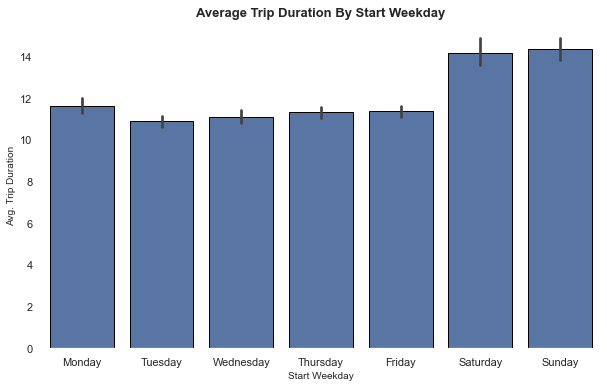

In [22]:
# Plotting average trip duration by weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fxBarPlot(df,'start_weekday', order = weekdays)

It is interesting that Saturday and Sunday have the highest trip durations despite having the least number of trips. However, this is understandable since people might have a lot of free time on the weekend.

Let's look at average trip duration between males and females next

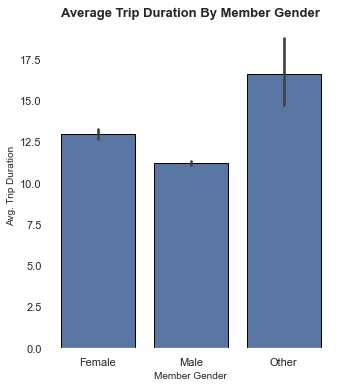

In [23]:
# Plotting average trip duration by Gender
fxBarPlot(df,'member_gender', order = ['Female','Male','Other'], figsize = (5,6))

Females ride a little longer on average than males do. The longest rides are a mixed of people whose gender are not recorded in the dataset. I wonder how female and male averages might be affected if every rider's gender was recorded.

Let's look too at the trip duration by year of birth

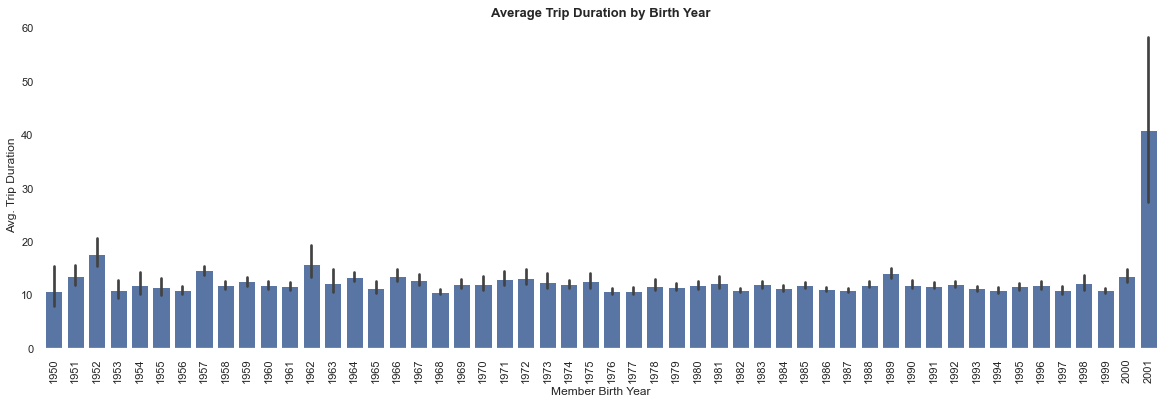

In [30]:
# Plotting average trip duration by Year of Birth
color = sb.color_palette()[0]
sb.barplot(data = df, x = 'member_birth_year', y = 'duration_mins', color = color)
sb.set(rc = {'axes.facecolor':'None', 'figure.figsize':(28,6)})
plt.xticks(rotation=90)
plt.ylabel('Avg. Trip Duration')
plt.xlabel('Member Birth Year');
plt.title('Average Trip Duration by Birth Year', fontsize = 13, weight = "bold");

I expected that as was seen in the number of rides by year of birth, young riders would go a longer time than their older counterparts but there are no significant differences between age groups. There is a high spark in 2021. This can be attributed to the very low number of trips taking by by people born in that year.

Let's also look too at the trip duration by user type

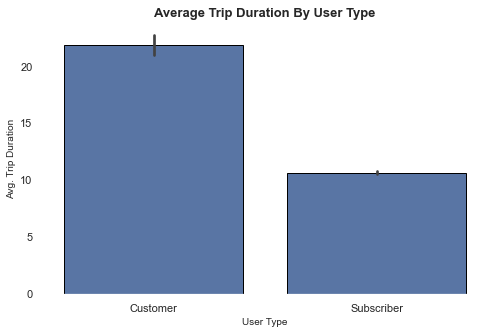

In [25]:
# Plotting average trip duration by user type
fxBarPlot(df,'user_type', figsize = (8,5))

Subscribers ride less than half the time customers ride. Customers are users with 24-hour or 3-day pass while Subscribers are those with annual membership. Number of subscriber trips are more than six times higher than customers. It is interesting to see that customers rides are longer. It makes sense that someone will want to use a 24-hour pass the the maximum. 

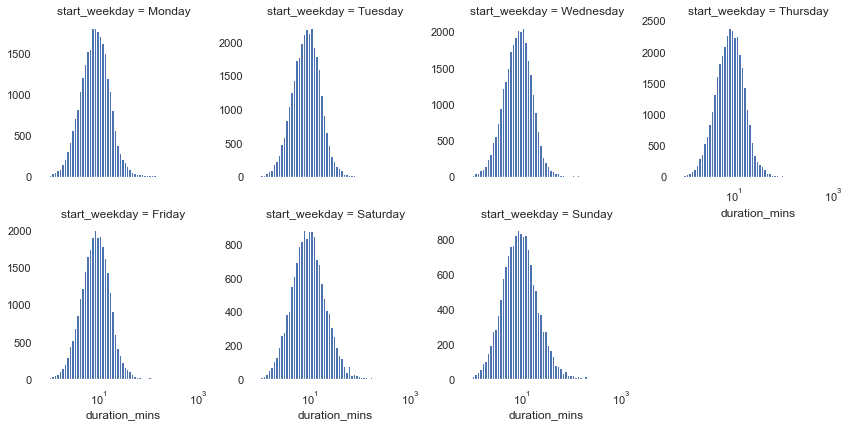

In [26]:
# Distribution of the duration in minutes on a log scale by Weekdays
color = sb.color_palette()[0]
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

logbins = 0.05
bins = 10 ** np.arange(0, 3+logbins, logbins)

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'start_weekday', col_wrap=4, sharey=False, col_order = weekdays)
g.map(plt.hist, "duration_mins", bins = bins)
plt.xscale('log');

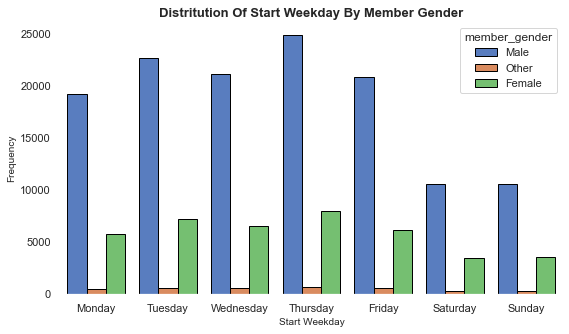

In [27]:
# Plotting gender by weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fxCountPlot(df,'start_weekday', hVar = 'member_gender', order = weekdays, figsize = (9,5), palette = 'muted')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Average weekend trip durations were higher than weekdays trips. This is surprising becuase the number of weekdays trips were significantly higher than those of Saturday and Sunday. Similarly, women rode longer than men. I had expected to see a correlation between trip duration and year of birth but this is no difference between older and younger riders. We also see from the the data that females ride longer than males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Comparing gender participation across the week, there were will more males than female on each weekday. Males were more than three times as high as females from Monday to Friday, and on weekends, males are more two times as high as females.

## Multivariate Exploration

In this section of our exploration, we will be looking at the relationship between three or more variables and their correlation, starting with trip duration, gender and user type. Are there difference when comparing gender across user types?

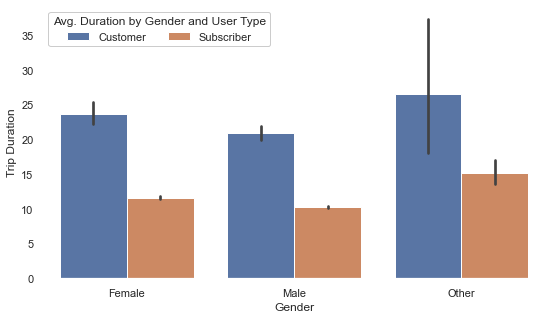

In [28]:
agu = sb.barplot(data = df, x = 'member_gender', y = 'duration_mins', hue = 'user_type', order = ['Female','Male','Other'])
agu.legend(loc = 2, ncol = 3, framealpha = 1, title = 'Avg. Duration by Gender and User Type')
sb.set(rc = {'axes.facecolor':'None', 'figure.figsize':(8,6)})
plt.ylabel('Trip Duration')
plt.xlabel('Gender');

##### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The exploration was extended to determine whether different user types peformed differently across gender, and days of the month. We still see that female and male customers rode longer than their subscriber counterparts. We also see from the point plot that customers with 24-hour or 3-day pass spend longer time riding on average than annual subscribers.

### Were there any interesting or surprising interactions between features?

Despite despite of annual subscriber riders being six times more than short-term customers, they did not account more most of the the long rides on the trips.

## Conclusions
My initial expectations about the data was that males and people with younger ages would take more trips, and that they would ride longer than females and older people, since they are generally stronger and adventurous. As was ecpected, males and younger people took more trips then females and older folk. However, on average, females rode longer distances than males and there was no difference in distance covered between old and young riders. While I also expected the weekend days to have the most trips, they were the least but they also had the longest trip durations.